In [61]:
import pandas as pd
import numpy as np

In [62]:
#读取数据
data_path=r"E:\桌面\python.数据分析\directory.csv"
data=pd.read_csv(data_path)
data

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25595,Starbucks,21401-212072,Rex,Licensed,"141 Nguyễn Huệ, Quận 1, Góc đường Pasteur và L...",Thành Phố Hồ Chí Minh,SG,VN,70000,08 3824 4668,GMT+000000 Asia/Saigon,106.70,10.78
25596,Starbucks,24010-226985,Panorama,Licensed,"SN-44, Tòa Nhà Panorama, 208 Trần Văn Trà, Quận 7",Thành Phố Hồ Chí Minh,SG,VN,70000,08 5413 8292,GMT+000000 Asia/Saigon,106.71,10.72
25597,Starbucks,47608-253804,Rosebank Mall,Licensed,"Cnr Tyrwhitt and Cradock Avenue, Rosebank",Johannesburg,GT,ZA,2194,27873500159,GMT+000000 Africa/Johannesburg,28.04,-26.15
25598,Starbucks,47640-253809,Menlyn Maine,Licensed,"Shop 61B, Central Square, Cnr Aramist & Coroba...",Menlyn,GT,ZA,181,NaN,GMT+000000 Africa/Johannesburg,28.28,-25.79


In [63]:
#1、查看星巴克旗下有哪些品牌？如果我们只关心星巴克咖啡门店，
#则只需要获取星巴克中Brand的数据集，并查看全世界一共有多少家星巴克门店。

In [64]:
#检查各列是否有空缺值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 
 9   Phone Number    18739 non-null  object 
 10  Timezone        25600 non-null  object 
 11  Longitude       25599 non-null  float64
 12  Latitude        25599 non-null  float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


In [65]:
#统计Brand这一列是否含有缺失值，如果为结果为0则无
data.Brand.isnull().sum()
print("Brand列缺失值为",data.Brand.isnull().sum(),"个")

Brand列缺失值为 0 个


In [66]:
#统计各个门店数量，
data_Brand_num=data.groupby('Brand').size().reset_index()
data_Brand_num.columns=['门店名称','数量']
data_Brand_num

,门店名称,数量
0,Coffee House Holdings,1
1,Evolution Fresh,2
2,Starbucks,25249
3,Teavana,348


In [67]:
#输出结果：·
data_Starbucks_num=data_Brand_num[2:3]
print("全世界Starbucks数量为：")
data_Starbucks_num

全世界Starbucks数量为：


,门店名称,数量
2,Starbucks,25249


In [68]:
#--------------------------------------------------------

In [69]:
#2、查看全世界一共有多少个国家和地区开设了星巴克门店，
# 显示门店数量排名前10和后10的国家和地区。

In [70]:
#通过无缺失值的Brand列计算门店数量，排序为降序方便后续使用
all_country_data = data.groupby(by="Country").count()[
    "Brand"].sort_values(ascending=False)
all_country_data

Country
US    13608
CN     2734
CA     1468
JP     1237
KR      993
      ...  
SK        3
TT        3
LU        2
MC        2
AD        1
Name: Brand, Length: 73, dtype: int64

In [71]:
# 排名前10的国家及数量：
top_country = all_country_data[:10]
top_country

Country
US    13608
CN     2734
CA     1468
JP     1237
KR      993
GB      901
MX      579
TW      394
TR      326
PH      298
Name: Brand, dtype: int64

In [72]:
# 排名后10的国家及数量：
min_country = all_country_data[-10:]
min_country

Country
BO    4
KH    4
AW    3
ZA    3
CW    3
SK    3
TT    3
LU    2
MC    2
AD    1
Name: Brand, dtype: int64

In [73]:
#----------------------------------------------------------------

In [74]:
#3、用柱状图绘制排名前10的分布情况。

In [75]:
#导入绘图相关的库
import matplotlib.pyplot as plt

In [83]:
#初始化绘图工具：
#显示中文、设置仿宋字体
plt.rcParams['font.sans-serif']=['FangSong']
#设置字体大小
plt.rcParams['font.size']=15
#正常显示符号
plt.rcParams['axes.unicode_minus'] = False
#确定x，y轴的值
top_x=top_country.index
top_y=top_country.values

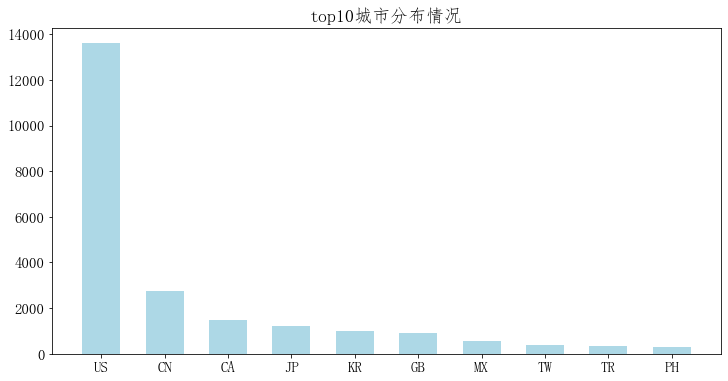

In [84]:
#设置尺寸大小
plt.figure(figsize=(12,6))
#绘图：x,y,颜色，宽度
plt.bar(top_x,top_y,color='lightblue',width=.6)
#添加文字标签
plt.title('top10城市分布情况')
plt.show()

In [ ]:
#-----------------------------------------------

In [ ]:
#4、显示拥有星巴克门店数量排名前10 的城市

In [24]:
#获取有星巴克门店的城市的店的数量,降序，方便后续使用
data_City=data.groupby('City')['Brand'].count().sort_values(ascending=False)
data_City

City
上海市                  542
Seoul                243
北京市                  234
New York             232
London               216
                    ... 
Miyoshi-machi          1
Mississippi State      1
Mission Hills          1
Mishima                1
's-Hertogenbosch       1
Name: Brand, Length: 5469, dtype: int64

In [26]:
#排名前十的城市：
data_City_top10=data_City[:10]
data_City_top10

City
上海市            542
Seoul          243
北京市            234
New York       232
London         216
Toronto        192
Chicago        180
Mexico City    180
Seattle        156
Las Vegas      156
Name: Brand, dtype: int64

In [ ]:
#----------------------------------------

In [ ]:
#绘制星巴克门店数前10的城市分布柱状图。

In [85]:
#数据准备
top_City_x=data_City_top10.index
top_City_y=data_City_top10.values

<BarContainer object of 10 artists>

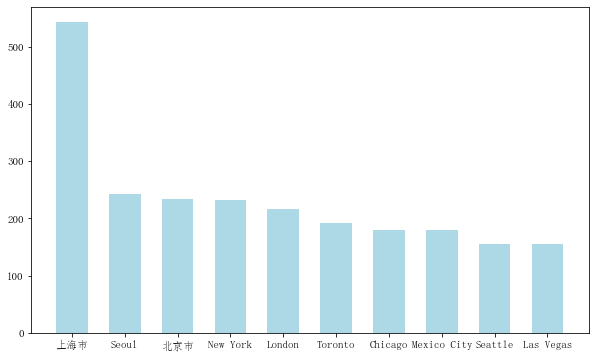

In [97]:
#设置字体大小
plt.rcParams['font.size']=11
#设置画布大小
plt.figure(figsize=(10,6))
#绘图：x,y,颜色，宽度
plt.bar(top_City_x,top_City_y,color='lightblue',width=.6)

In [98]:
#--------------------------------------------

In [ ]:
#6、按照星巴克门店在中国的分布情况，统计排名前10的城市。

In [113]:
#设置筛选数据的条件
data_China_bool=data['Country']=='CN'
#开始筛选只剩China
data_China_true=data[data_China_bool]
#统计数量，同上题降序
data_China=data_China_true.groupby(by='City')[
    'Brand'].count().sort_values(ascending=False)
data_China_top10=data_China[:10]
data_China_top10

City
上海市          542
北京市          234
杭州市          117
深圳市          113
广州市          106
Hong Kong    104
成都市           98
苏州市           90
南京市           73
武汉市           67
Name: Brand, dtype: int64

In [114]:
#--------------------

In [ ]:
#7、绘制柱状图。

In [115]:
#获取x，y轴数据
data_China_x=data_China_top10.index
data_China_y=data_China_top10.values

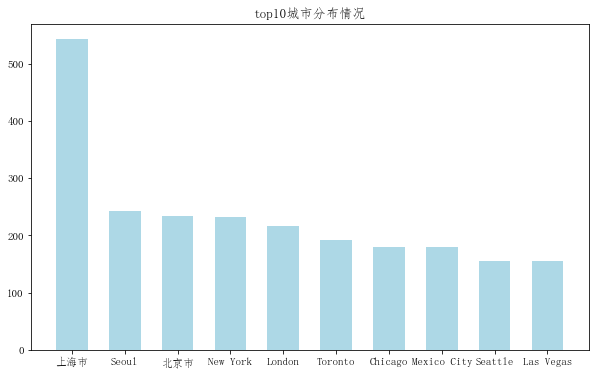

In [118]:
#显示中文、设置仿宋字体
plt.rcParams['font.sans-serif']=['FangSong']
#设置字体大小
plt.rcParams['font.size']=11
#设置画布大小
plt.figure(figsize=(10,6))
#绘图：x,y,颜色，宽度
plt.bar(top_City_x,top_City_y,color='lightblue',width=.6)
#添加文字标签
plt.title('China星巴克数量top10排行分布')
plt.show()

In [119]:
#--------------------------------------------

In [ ]:
#8、用饼图显示星巴克门店的经营方式有哪几种？

In [121]:
#统计经营方式数量，同上降序
data_type=data.groupby(by='Ownership Type')[
    "Brand"].count().sort_values(ascending=False)
data_type

Ownership Type
Company Owned    11932
Licensed          9375
Joint Venture     3976
Franchise          317
Name: Brand, dtype: int64

In [133]:
# 数据准备：
data_type_label=data_type.index
data_type_y=data_type.values

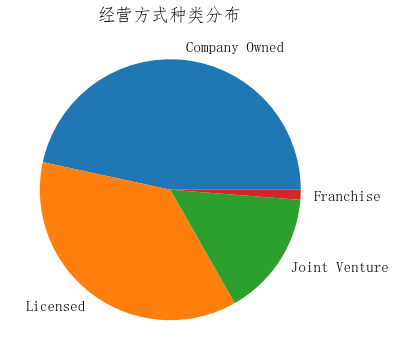

In [141]:
#设置画布大小
plt.figure(figsize=(6,6))
#显示中文、设置仿宋字体
plt.rcParams['font.sans-serif']=['FangSong']
#正常显示符号
plt.rcParams['axes.unicode_minus'] = False
#设置字体大小
plt.rcParams['font.size']=15
plt.pie(data_type_y, labels=data_type_label)
#添加文字标签
plt.title('经营方式种类分布')
plt.show()